In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/   
   
https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix

In [32]:
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from matplotlib import pyplot

# CONTENTS
### ROC Curve and AUC   
- balanced classes examples  
   
### Confusion matrix, classification report   
- continue with example above
   
### Precision-Recall Curve   
- balanced classes examples   
   
### Imbalanced classes examples   
- ROC-AUC   
- confusion matrix   
- precision-recall   
   
### Summary

# ROC Curve and AUC
The ROC curve is a useful tool for a few reasons:   
    - The curves of different models can be compared directly in general or for different thresholds.   
    - The area under the curve (AUC) can be used as a summary of the model skill.
The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.   

To make this clear:   
    - Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.   
    - Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.   

If you are confused, remember, when we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive). There is a tension between these options, the same with true negative and false negative.

### balanced classes examples

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


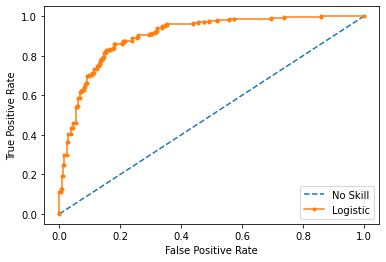

In [28]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill');
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic');
# axis labels
pyplot.xlabel('False Positive Rate');
pyplot.ylabel('True Positive Rate');
# show the legend
pyplot.legend();
# show the plot
pyplot.show();

# Confusion matrix, classification report
### continue with example above

In [29]:
# confusion matrix
predicty = model.predict(trainX)
confusion_matrix(trainy, predicty)
confusion_matrix(trainy, predicty, normalize='all')

array([[226,  35],
       [ 33, 206]], dtype=int64)

array([[0.452, 0.07 ],
       [0.066, 0.412]])

In [30]:
tn, fp, fn, tp = confusion_matrix(trainy, predicty).ravel()
tn, fp, fn, tp

(226, 35, 33, 206)

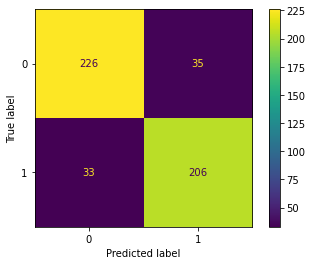

In [31]:
plot_confusion_matrix(model, trainX, trainy)

In [34]:
# classification report
print(classification_report(trainy, predicty, digits=3))

              precision    recall  f1-score   support

           0      0.873     0.866     0.869       261
           1      0.855     0.862     0.858       239

    accuracy                          0.864       500
   macro avg      0.864     0.864     0.864       500
weighted avg      0.864     0.864     0.864       500



# Precision-Recall Curve

### balanced classes examples

Logistic: f1=0.841 auc=0.898


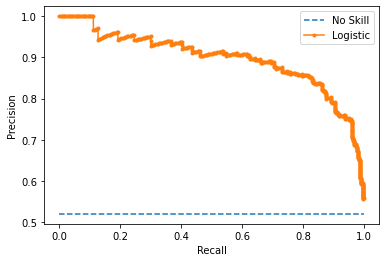

In [6]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill');
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic');
# axis labels
pyplot.xlabel('Recall');
pyplot.ylabel('Precision');
# show the legend
pyplot.legend();
# show the plot
pyplot.show();

# Imbalanced classes example

### ROC- AUC
Indeed, it has skill, but all of that skill is measured as making correct true negative predictions and there are a lot of negative predictions to make.

If you review the predictions, you will see that the model predicts the majority class (class 0) in all cases on the test set. The score is very misleading.

A plot of the ROC Curve confirms the AUC interpretation of a skilful model for most probability thresholds.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.716


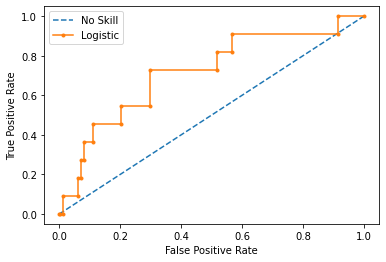

In [24]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill');
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic');
# axis labels
pyplot.xlabel('False Positive Rate');
pyplot.ylabel('True Positive Rate');
# show the legend
pyplot.legend();
# show the plot
pyplot.show();

### confusion matrix

In [25]:
predicty = model.predict(trainX)
confusion_matrix(trainy, predicty)
confusion_matrix(trainy, predicty, normalize='all')

array([[496,   0],
       [  2,   2]], dtype=int64)

array([[0.992, 0.   ],
       [0.004, 0.004]])

In [26]:
tn, fp, fn, tp = confusion_matrix(trainy, predicty).ravel()
tn, fp, fn, tp

(496, 0, 2, 2)

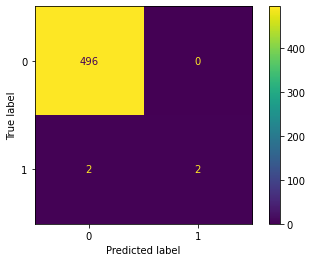

In [27]:
plot_confusion_matrix(model, trainX, trainy)

### precision-recall
We can see that the model is penalized for predicting the majority class in all cases. The scores show that the model that looked good according to the ROC Curve is in fact barely skillful when considered using using precision and recall that focus on the positive class.   
`Logistic: f1=0.000 auc=0.054`

The plot of the precision-recall curve highlights that the model is just barely above the no skill line for most thresholds.

This is possible because the model predicts probabilities and is uncertain about some cases. These get exposed through the different thresholds evaluated in the construction of the curve, flipping some class 0 to class 1, offering some precision but very low recall.

Logistic: f1=0.000 auc=0.054


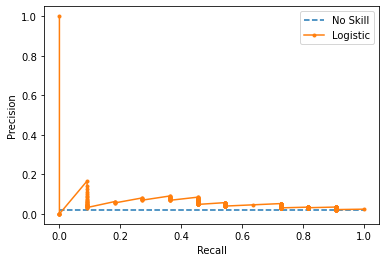

In [8]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99,0.01], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# predict class values
yhat = model.predict(testX)

# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)

# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
                                           
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill');
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic');
# axis labels
pyplot.xlabel('Recall');
pyplot.ylabel('Precision');
# show the legend
pyplot.legend();
# show the plot
pyplot.show();

# Summary
Generally, the use of ROC curves and precision-recall curves are as follows:   
    - ROC curves should be used when there are roughly equal numbers of observations for each class.   
    - Precision-Recall curves should be used when there is a moderate to large class imbalance. 
   
The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.